In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plant-pathology-2020-fgvc7/sample_submission.csv
/kaggle/input/plant-pathology-2020-fgvc7/train.csv
/kaggle/input/plant-pathology-2020-fgvc7/test.csv
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1743.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_262.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1524.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1336.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1461.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1797.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1499.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1170.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1259.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_422.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_636.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1395.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1800.jpg
/kaggle/input/plant-patholog

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
df = pd.read_csv('/kaggle/input/plant-pathology-2020-fgvc7/train.csv')
df.head()


image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0

In [3]:
df.columns


Index(['image_id', 'healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')

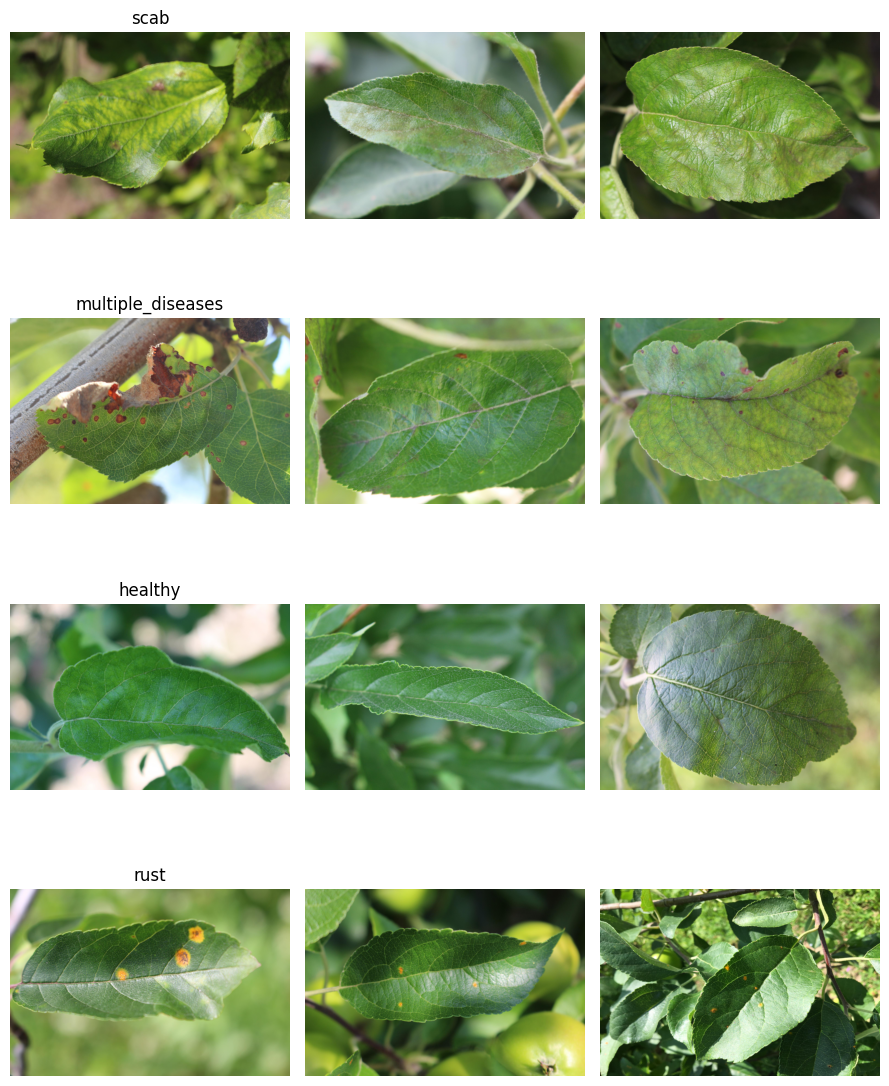

In [4]:
img_dir = '/kaggle/input/plant-pathology-2020-fgvc7/images'


def get_label(row):
    for label in ['healthy', 'multiple_diseases', 'rust', 'scab']:
        if row[label] == 1:
            return label

df['label'] = df.apply(get_label, axis=1)

samples = 3
labels = df['label'].unique()
fig, axs = plt.subplots(len(labels), samples, figsize=(samples * 3, len(labels) * 3))

for row_idx, label in enumerate(labels):
    subset = df[df['label'] == label].head(samples)

    for col_idx, image_id in enumerate(subset['image_id']):
        img_path = os.path.join(img_dir, image_id + '.jpg')
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axs[row_idx, col_idx].imshow(img_rgb)
        axs[row_idx, col_idx].axis('off')
        if col_idx == 0:
            axs[row_idx, col_idx].set_title(label, fontsize=12)

plt.tight_layout()
plt.show()

In [5]:
X = []
for image_id in df['image_id'].head(10):  # contoh ambil 10 gambar
    img_path = os.path.join(img_dir, image_id + '.jpg')
    img = cv2.imread(img_path)
    X.append(img)

shapes = [img.shape for img in X]

unique_shapes = set(shapes)
if len(unique_shapes) == 1:
    print(f"Semua gambar memiliki dimensi yang sama: {unique_shapes.pop()}")
else:
    print(f"Terdapat {len(unique_shapes)} dimensi gambar berbeda:")
    for s in unique_shapes:
        print(s)


Semua gambar memiliki dimensi yang sama: (1365, 2048, 3)


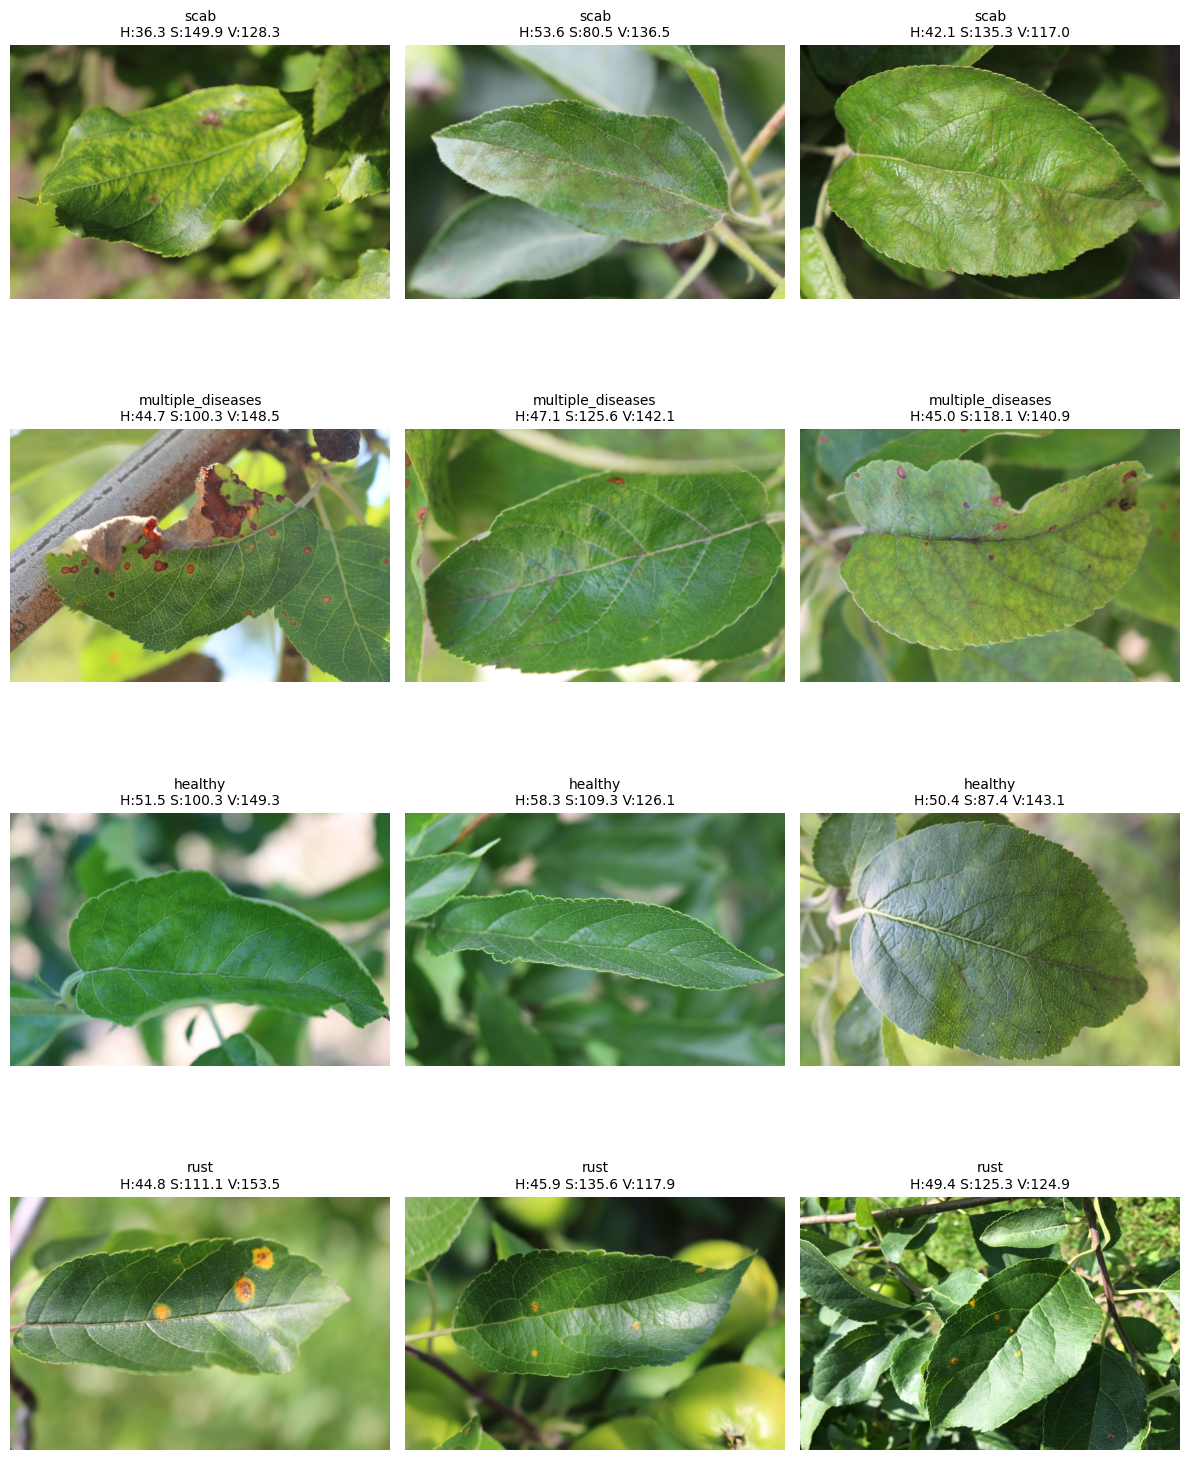

In [6]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lokasi dataset
img_dir = '/kaggle/input/plant-pathology-2020-fgvc7/images'

# Load CSV label
df = pd.read_csv('/kaggle/input/plant-pathology-2020-fgvc7/train.csv')

# Tambahkan kolom label berdasarkan 1-hot encoding
def get_label(row):
    for label in ['healthy', 'multiple_diseases', 'rust', 'scab']:
        if row[label] == 1:
            return label

df['label'] = df.apply(get_label, axis=1)

# Visualisasi dan ekstraksi HSV
samples = 3
labels = df['label'].unique()
fig, axs = plt.subplots(len(labels), samples, figsize=(samples * 4, len(labels) * 4))

for row_idx, label in enumerate(labels):
    subset = df[df['label'] == label].head(samples)

    for col_idx, image_id in enumerate(subset['image_id']):
        img_path = os.path.join(img_dir, image_id + '.jpg')
        img_bgr = cv2.imread(img_path)

        # Konversi ke RGB dan HSV
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

        # Ekstraksi fitur HSV
        h_mean = np.mean(img_hsv[:, :, 0])
        s_mean = np.mean(img_hsv[:, :, 1])
        v_mean = np.mean(img_hsv[:, :, 2])

        # Tampilkan gambar
        axs[row_idx, col_idx].imshow(img_rgb)
        axs[row_idx, col_idx].axis('off')
        axs[row_idx, col_idx].set_title(
            f"{label}\nH:{h_mean:.1f} S:{s_mean:.1f} V:{v_mean:.1f}",
            fontsize=10
        )

plt.tight_layout()
plt.show()
